In [1]:
import matplotlib.pyplot as plt

In [47]:
class point:
    def __init__(self,x,y):
        self.x = x
        self.y = y

In [80]:
class rot:
    def __init__(self, p0,p1,p2):
        if type(p0) == tuple:
            self.p0 = point(p0[0],p0[1])
        else:
            self.p0 = p0
            
        if type(p1) == tuple:
            self.p1 = point(p1[0],p1[1])
        else:
            self.p1 = p1
            
        if type(p2) == tuple:
            self.p2 = point(p2[0],p2[1])
        else:
            self.p2 = p2
    
    def cross_prod(self):
        return (self.p1.x-self.p0.x)*(self.p2.y-self.p0.y)-(self.p1.y-self.p0.y)*(self.p2.x-self.p0.x)
        
    def rot(self, verbose = True):
        plt.figure('Rotation')
        rot = self.cross_prod()
        if verbose:
            if rot > 0:
                print(f'{p1} rotado en sentido horario respecto a {p2}, con {p0} como origen')
            elif rot < 0:
                print(f'{p1} rotado en sentido anti-horario respecto a {p2}, con {p0} como origen')
            else:
                print(f'{p1} colineal a {p2}, con {p0} como origen')
        return rot
    
    def plot(self):
        plt.arrow(self.p0.x,self.p0.y, self.p1.x-self.p0.x, self.p1.y-self.p0.y, head_width=0.05, head_length=0.05, label = p1)
        plt.arrow(self.p0.x,self.p0.y, self.p2.x-self.p0.x, self.p2.y-self.p0.y, head_width=0.05, head_length=0.05, color = 'red', label = p2)
        plt.legend()
        
class turn:
    def __init__(self, p0,p1,p2):
        if type(p0) == tuple:
            self.p0 = point(p0[0],p0[1])
        else:
            self.p0 = p0
            
        if type(p1) == tuple:
            self.p1 = point(p1[0],p1[1])
        else:
            self.p1 = p1
            
        if type(p2) == tuple:
            self.p2 = point(p2[0],p2[1])
        else:
            self.p2 = p2
    
    def cross_prod(self):
        return (self.p1.x-self.p0.x)*(self.p2.y-self.p0.y)-(self.p1.y-self.p0.y)*(self.p2.x-self.p0.x)
        
    def turn(self, verbose = True):
        rot = self.cross_prod()
        if verbose:
            if rot > 0:
                print(f'En {p1} se hace un giro en sentido anti-horario')
            elif rot < 0:
                print(f'En {p1} se hace un giro en sentido horario')
            else:
                print(f'En {p1} no se gira')
        return rot
    
    def plot(self):
        plt.figure('Turn')
        plt.arrow(self.p0.x,self.p0.y, self.p1.x-self.p0.x, self.p1.y-self.p0.y, head_width=0.05, head_length=0.05, label = p1)
        plt.arrow(self.p1.x,self.p1.y, self.p2.x-self.p1.x, self.p2.y-self.p1.y, head_width=0.05, head_length=0.05, color = 'red', label = p2)
        plt.legend()

In [ ]:
class inter:
    def __init__(self, p0, p1, p2, p3):
        self.p0 = point(p0[0],p0[1])
        self.p1 = point(p1[0],p1[1])
        self.p2 = point(p2[0],p2[1])
        self.p3 = point(p2[0],p2[1])
        
        self.d0 = rot(p2,p0,p1)
        self.d1 = 
        self.d2 =
        self.d3 =
        
        
    def 

(1, 0) rotado en sentido horario respecto a (0, 1), con (0, 0) como origen
1
En (1, 0) se hace un giro en sentido anti-horario
1


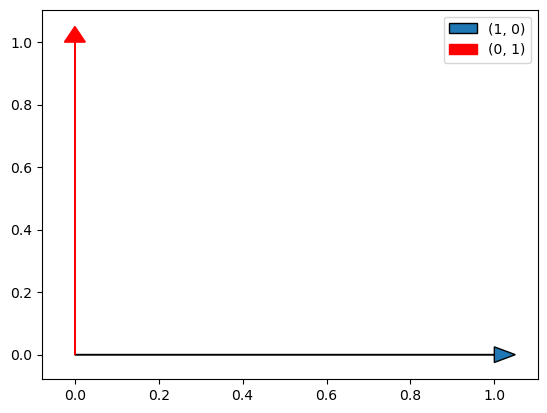

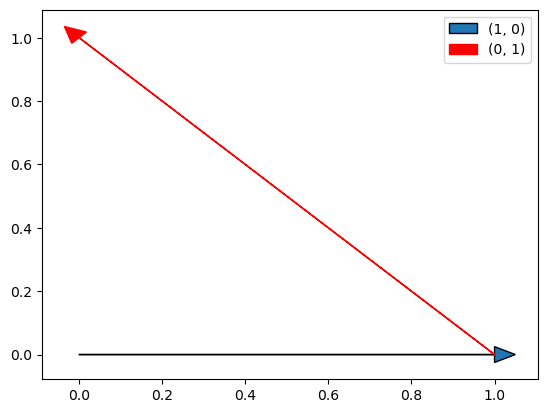

In [82]:
p0 = (0,0)
p1 = (1,0)
p2 = (0,1)

ejer = rot(p0,p1,p2)
print(ejer.rot())
ejer.plot()

ejer = turn(p0,p1,p2)
print(ejer.turn())
ejer.plot()